# Word Embedding with Deep Learning
</br>
<font color=green>__doc2vec and German elections__</font>

### Outline
 - why converting text to numbers
 - NLP and deep learning
 - word2vec and other methods
 - data overview
 - implementation and code
 - analysing results

### Starting point
 - massive text corpus
 - transformation from text to numeric - never easy but very needed
 - sparse data
 - document retrieval, web search, spam filtering, topic modeling, recommendations, etc


### Current arsenal
 - bag of words (BOW): simple but mostly inefficient due to lost order
 - Latent Dirichlet Allocation (LDA): more efficient but hard to play with
 - word2vec and doc2vec
 - GloVE
 - ..more coming

### Weapon of choice

doc2vec is essentially word2vec with documents being treated __like__ words,
__together__ with words 
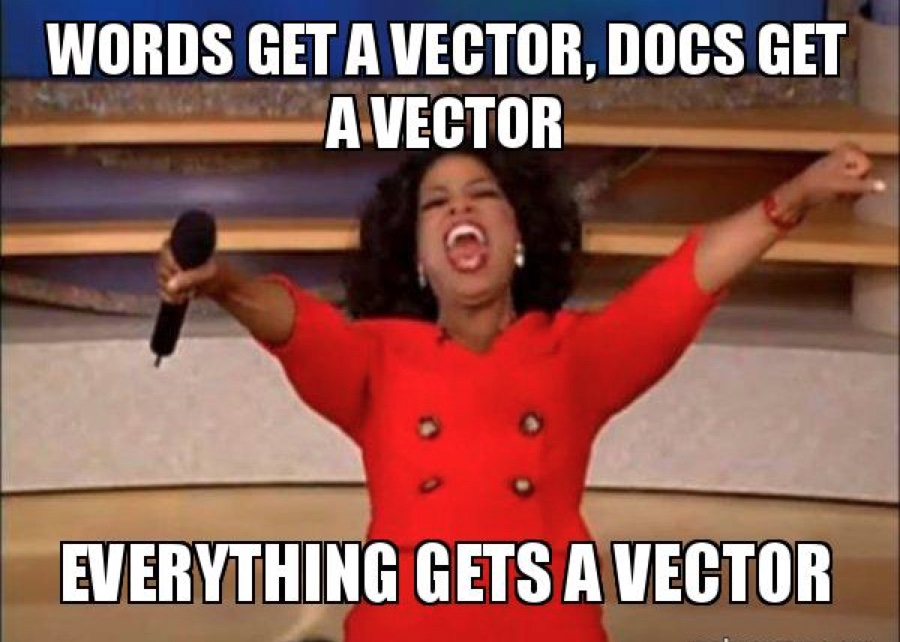

### word2vec - all about relationships
- onehot encoding (id#4e2fsd) __vs__ vectors (0.54, 0.78, 0.12...0,83)
- we grasp synonyms, antonyms, or analogies
- 2 algorithms to execute: __CBOW__ and __Skip-Gram__

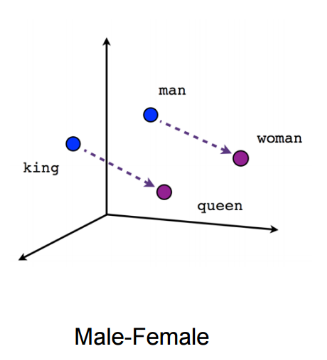

In [2]:
#(include gif with moving vectors), below - our example of sliding window

### Continuous Bag-of-Words model (CBOW)
1. words are feature vectors (semantic characteristics)
2. select a size of gliding window
3. train
4. words became word-vectors (calibrated semantic characteristics)
5. predict the missing word _(hello, google search...)_
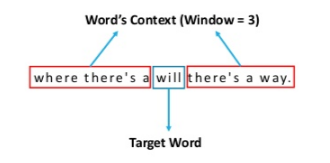

In [ ]:
#need to look more into how the feature vectors are created

### Skip-Gram model
1. reverse CBOW: predict the surrounding, using one word
2. (context, target) pairs
3. network is going to learn the statistics from the number of times each pairing shows up
4. takes in pairs (word1, word2) generated by moving a window across text data, and trains a 1-hidden-layer neural network based on the fake task of given an input word, giving us a predicted probability distribution of nearby words to the input. The hidden-to-output weights in the neural network give us the word embeddings. So if the hidden layer has 300 neurons, this network will give us 300-dimensional word embeddings. We use one-hot encoding for the words.

### doc2vec
 - goal: create a numeric representation of a document
 - 
 - embeds words in a high-dimensional vector space using a shallow neural network
 - model: Distributed Memory version of Paragraph Vector (PV-DM)
 - instead of using just words to predict the next word, we also added another feature vector, which is document-unique
 - in a way, it labels the document topic
 - it's an __unsupervised__ model
 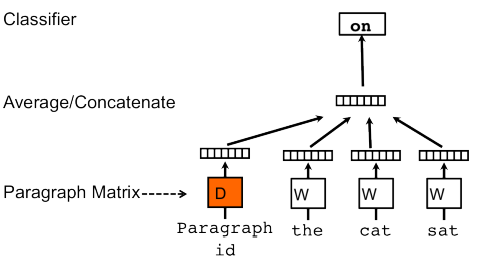

Paragraph Vector
Le and Mikolov 2014 introduces the Paragraph Vector, which outperforms more naïve representations of documents such as averaging the Word2vec word vectors of a document. The idea is straightforward: we act as if a paragraph (or document) is just another vector like a word vector, but we will call it a paragraph vector. We determine the embedding of the paragraph in vector space in the same way as words. Our paragraph vector model considers local word order like bag of n-grams, but gives us a denser representation in vector space compared to a sparse, high-dimensional representation.
Paragraph Vector - Distributed Memory (PV-DM)
This is the Paragraph Vector model analogous to Continuous-bag-of-words Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of inferring a center word based on context words and a context paragraph. A paragraph is a context for all words in the paragraph, and a word in a paragraph can have that paragraph as a context.
Paragraph Vector - Distributed Bag of Words (PV-DBOW)
This is the Paragraph Vector model analogous to Skip-gram Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.


### doc2vec training
 - gensim
 - it's an __unsupervised__ model
 - in order to get better performance, we will tag the docs (##add screenshot)

### data - FB posts of  candidates for german elections

We thought that the ever increasing use of social media in politics might be an approach to find some nice text data

# Heiko Maas (SPD), minister of justice:

> In den vergangenen Wochen gab es eine sehr lebhafte und teilweise laute Diskussion um den Gesetzentwurf zur besseren Rechtsdurchsetzung in den sozialen Netzwerken. Ich freue mich, dass sich so viele Menschen an der Debatte beteiligt haben – auch hier auf Facebook.    

>**In the last weeks there was a very lively and partly loud discussion about the bill for a better rule of law in the social networks. I'm glad that many people have participated in the debate here too on facebook.**

[...]

>Nur, wenn alle diesen Respekt zeigen, gibt es auch Freiheit für alle – und deshalb ist unser Gesetzentwurf keine Beschränkung der Meinungsfreiheit, sondern er stärkt und er schützt sie gegenüber denen, die sie verletzen. (Foto: DPA) Mehr Infos: www.bmjv.de/fair-im-netz

>**There is only freedom for all if all show this respect that's why this bill is no limitation of the freedom of speech. The bill instead strenghtens and protects it against those who want to violate it.**

June 30, 2017 on his facebook page.

* likes: 204
* shares: 60
* angry: 63
* comments: 605

# Jens Spahn (CDU):

>Erschütternde Szenen aus Hamburg. Diese vermummten Linksfaschisten zerstören die Autos von Familien, Azubis, Bürgern, sie verletzen Menschen und skandieren Hass. Und zur Belohnung gibt es Applaus von den Linken und eine verständnisvolle Berichterstattung im öffentlich-rechtlichen. Ätzend. Die Polizei hat unsere volle Unterstützung verdient, wenn sie darauf mit der nötigen Härte reagiert. Punkt.

July 7, 2017 on his facebook page.

* shares: 16711
* likes: 18395
* angry: 8660
* comments: 5146

# Dr. Frauke Petry (AfD):

>++ Die tägliche Zwei-Klassen-Gesellschaft ++ Für 11 Euro in Berlin und für 16 Euro in NRW bekommen Asylanten drei Mahlzeiten pro Tag, während ein Hartz-IV-Empfänger täglich mit nur 4,72 Euro auskommen muss. [...]

January 9, 2017 on his facebook page.

* shares: 21296
* likes: 6770
* angry: 5183
* comments: 3045

# Most successful post of Angela Merkel:

![alt text](angela_profile.png "merkel profile picture")

her newest profil picture post on July 25, 2017.

* shares: 3128
* likes: 135151
* comments: 12774

# Data

* 1001 politicans + seven parties
* 177307 posts in total
* between **1. January** and **24. September 2017** (election day)


# Variables
       
   ## Facebook
       
       'id', 'from_id', 'from_name', 'message',
       'created_time', 'type', 'link', 'story', 'comments_count',
       'shares_count', 'likes_count', 'love_count', 'haha_count', 'wow_count',
       'sad_count', 'angry_count', 
       
   ## Individual
       'RFBL', 'Name_1', 'Partei_NR',
       'Partei_ABK', 'Geschlecht', 'Jahrgang', 'LAND_NR', 'Kandidatur',
       'Listenplatz', 'WKR_NR', 'MdB_2013', 'MdB_2017'